# Importação de bibliotecas


In [ ]:
#-- Importanção de bibliotecas
import numpy as np
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df1 = df[df.Store == 29]
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064
4005,29,2010-02-12,529672.95,1,28.14,2.771,131.586613,10.064
4006,29,2010-02-19,542399.07,0,31.96,2.747,131.637000,10.064
4007,29,2010-02-26,488417.61,0,35.98,2.753,131.686000,10.064
4008,29,2010-03-05,535087.91,0,36.82,2.766,131.735000,10.064
...,...,...,...,...,...,...,...,...
4142,29,2012-09-28,489674.23,0,62.17,4.018,138.739500,9.419
4143,29,2012-10-05,520632.80,0,62.09,4.027,138.825600,9.151
4144,29,2012-10-12,513737.00,0,54.18,4.029,138.911700,9.151
4145,29,2012-10-19,516909.24,0,55.28,4.000,138.833613,9.151


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

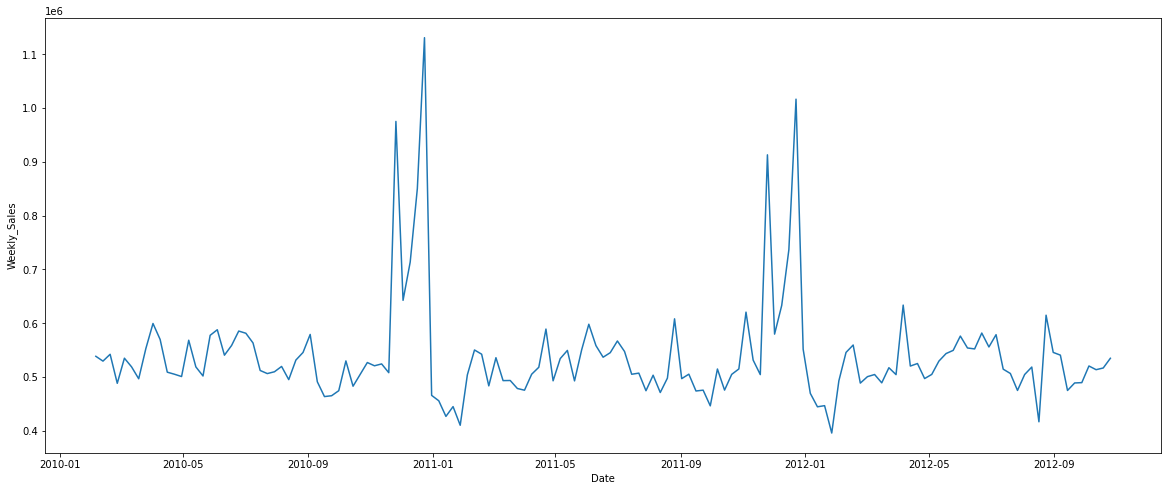

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')

<ipython-input-43-e176aae74174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

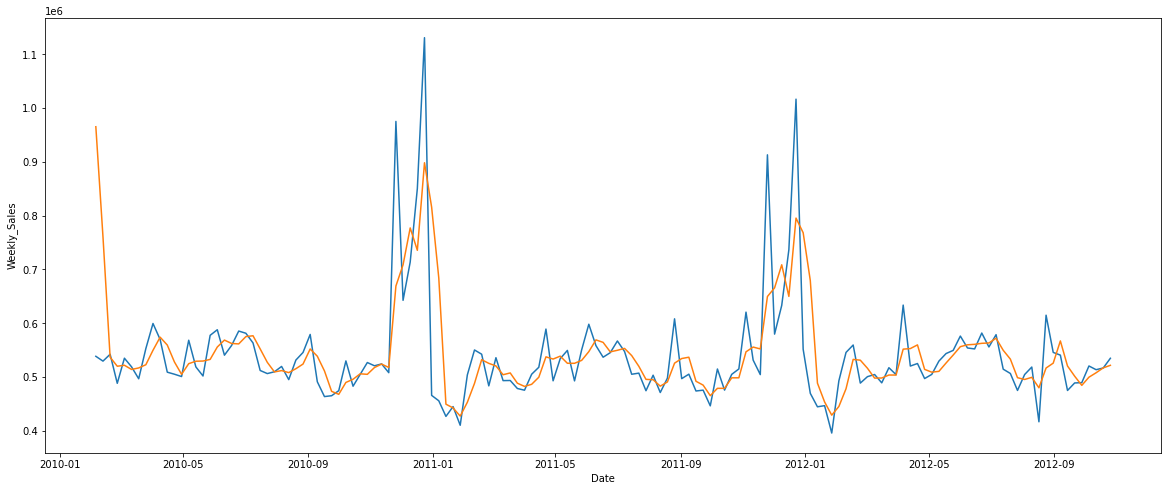

In [ ]:
df1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.lineplot(data=df1,x='Date',y='Moving_avg')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

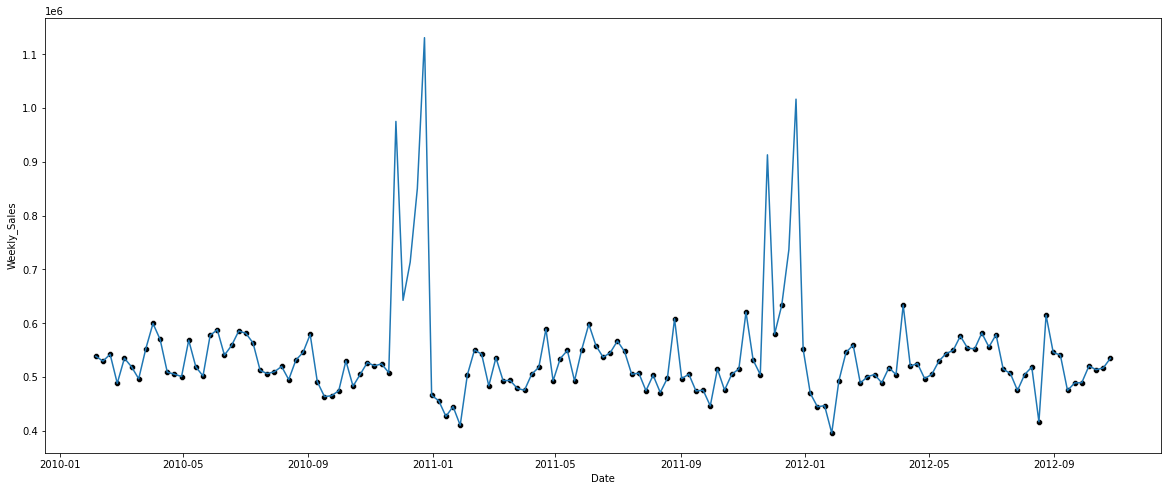

In [ ]:
lim_cut = df1.describe(percentiles=[0.8,0.9,0.95,0.99])['Weekly_Sales']['95%']
df1_clean = df1[df1.Weekly_Sales <= lim_cut]

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.scatterplot(data=df1_clean,x='Date',y='Weekly_Sales',color='k')

<ipython-input-56-4a93b44c7b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales_N'] = df1['Weekly_Sales']/df1['Weekly_Sales'].max()


<Axes: xlabel='Date', ylabel='Sales_N'>

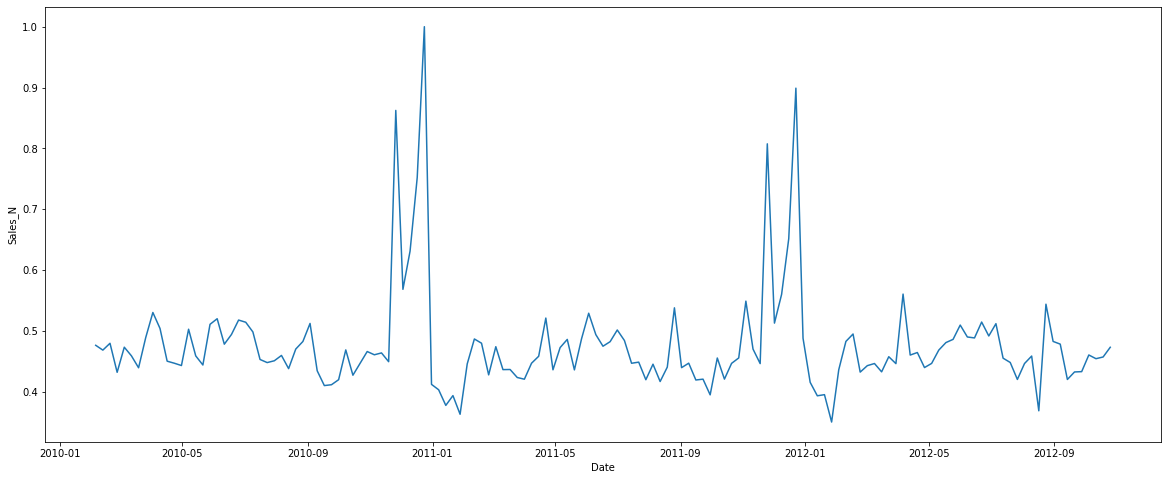

In [ ]:
df1['Sales_N'] = df1['Weekly_Sales']/df1['Weekly_Sales'].max()
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Sales_N')

<ipython-input-62-c85bfaceb912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()
<ipython-input-62-c85bfaceb912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Acum_sales_perc'] = df1['Acum_sales']/df1['Weekly_Sales'].sum()


<Axes: xlabel='Date', ylabel='Sales_N'>

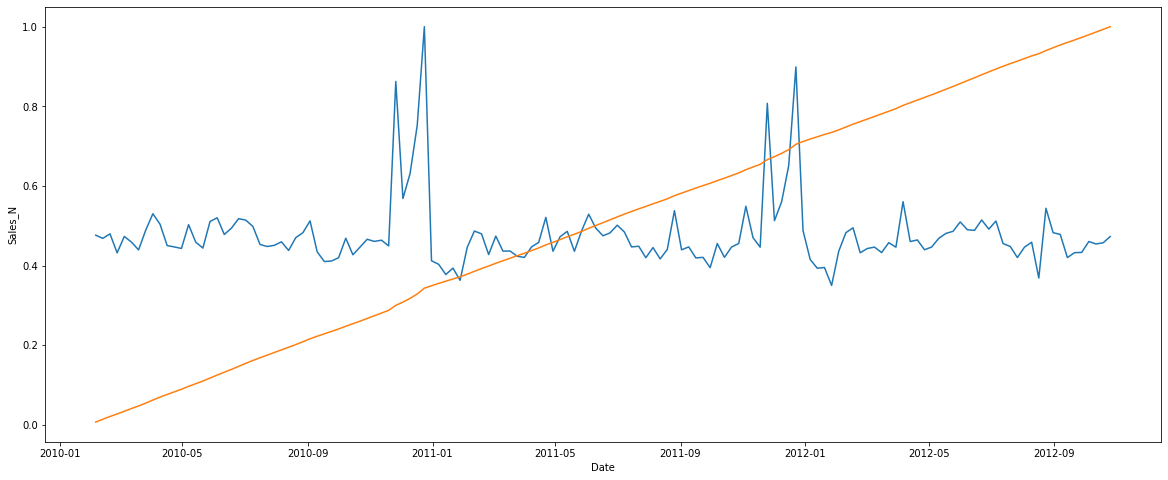

In [ ]:
df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()
df1['Acum_sales_perc'] = df1['Acum_sales']/df1['Weekly_Sales'].sum()
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Sales_N')
sns.lineplot(data=df1,x='Date',y='Acum_sales_perc')

In [ ]:
df1['Weekly_Sales'].describe()

count    1.430000e+02
mean     5.394514e+05
std      9.912014e+04
min      3.959872e+05
25%      4.944612e+05
50%      5.186284e+05
75%      5.520409e+05
max      1.130927e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
df1_clean['Weekly_Sales'].describe()

count       135.000000
mean     519716.287778
std       43930.500143
min      395987.240000
25%      493294.900000
50%      515119.640000
75%      546715.490000
max      633826.550000
Name: Weekly_Sales, dtype: float64

In [ ]:

df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100
df1

<ipython-input-17-b0488c1ab21d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Dif_relative
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,-0.105461
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06,-1.826434
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06,-12.546189
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06,10.291285
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,1.486871e+06,-4.585725
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,1.537990e+06,16.264236
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,1.560306e+06,-5.848335
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,1.583976e+06,-4.132297


In [ ]:
df1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
df1.groupby(['Year_Month','Store']).agg({'Weekly_Sales':['mean','max','min','sum'],
                                         'Dif_relative':['mean','max','min','sum','std']})

<ipython-input-25-debcb0c9ec8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')


Weekly_Sales                                      \
                          mean         max         min         sum   
Year_Month Store                                                     
2010-02    1      1.576836e+06  1643690.90  1409727.59  6307344.10   
2010-03    1      1.467823e+06  1554806.68  1404429.92  5871293.98   
2010-04    1      1.484560e+06  1594968.28  1391256.12  7422801.92   
2010-05    1      1.482485e+06  1603955.12  1399662.07  5929938.64   
2010-06    1      1.521020e+06  1615524.71  1422711.60  6084081.46   
2010-07    1      1.448897e+06  1546074.18  1371986.60  7244483.04   
2010-08    1      1.518988e+06  1605491.78  1449142.92  6075952.95   
2010-09    1      1.457448e+06  1540163.53  1351791.03  5829793.92   
2010-10    1      1.430128e+06  1508239.93  1345454.00  7150641.75   
2010-11    1      1.621387e+06  1955624.11  1483784.18  6485547.06   
2010-12    1      1.775391e+06  2387950.20  1367320.01  8876953.18   
2011-01    1      1.370013e+06  1444732.28  1316899.31  5480050.97   
2011-02    1      1.599972e+06  1686842.78  1456800.28  6399887.57   
2011-03    1      1.576844e+06  1636263.41  1541102.38  6307375.48   
2011-04    1      1.537825e+06  1614259.35  1455090.69  7689123.60   
2011-05    1      1.532108e+06  1629391.28  1428218.27  6128431.80   
2011-06    1      1.548743e+06  1635078.41  1438830.15  6194971.74   
2011-07    1      1.445531e+06  1534849.64  1352219.79  7227654.31   
2011-08    1      1.536246e+06  1624383.75  1464693.46  6144985.73   
2011-09    1      1.475908e+06  1550229.22  1380020.27  7379542.34   
2011-10    1      1.518082e+06  1630989.95  1445249.09  6072327.75   
2011-11    1      1.716243e+06  2033320.66  1539483.70  6864972.83   
2011-12    1      1.806519e+06  2270188.99  1497462.72  9032594.71   
2012-01    1      1.430923e+06  1550369.92  1319325.59  5723690.52   
2012-02    1      1.699519e+06  1819870.00  1539387.83  6798074.91   
2012-03    1      1.640399e+06  1688420.76  1511068.07  8201997.40   
2012-04    1      1.627804e+06  1899676.88  1468928.37  6511214.82   
2012-05    1      1.611741e+06  1684519.99  1555444.55  6446962.46   
2012-06    1      1.604117e+06  1697230.96  1527845.81  8020582.84   
2012-07    1      1.558487e+06  1769854.16  1439123.71  6233946.67   
2012-08    1      1.579524e+06  1631135.79  1494122.38  7897619.59   
2012-09    1      1.530595e+06  1661767.33  1437059.26  6122381.52   
2012-10    1      1.561397e+06  1670785.97  1493659.74  6245587.29   

                 Dif_relative                                              
                         mean        max        min        sum        std  
Year_Month Store                                                           
2010-02    1        -4.826028  -0.105461 -12.546189 -14.478085   6.741002  
2010-03    1         0.136161  10.291285  -7.413468   0.544643   7.904052  
2010-04    1         0.531106  13.566954  -5.135195   2.655531   7.915557  
2010-05    1         0.423979  12.550300  -6.839569   1.695916   9.110498  
2010-06    1         0.097018  12.810461  -5.359763   0.388072   8.557228  
2010-07    1        -0.628095   4.899555  -6.282704  -3.140476   4.867137  
2010-08    1         1.764335  17.019494  -6.057584   7.057340  10.517688  
2010-09    1        -1.612473   6.280996  -5.494184  -6.449892   5.473932  
2010-10    1         0.624840   7.511403  -7.808304   3.124202   6.092884  
2010-11    1         9.874051  31.799768  -3.685074  39.496204  16.141778  
2010-12    1        -3.245005  26.277424 -42.740849 -16.225025  27.964398  
2011-01    1        -0.855227   5.661606  -4.572818  -3.420909   4.636464  
2011-02    1         3.323936  22.000943 -13.637459  13.295742  14.583997  
2011-03    1         1.624545  12.318993  -5.076920   6.498180   7.624969  
2011-04    1        -1.015813   7.972538  -7.012253  -5.079063   5.655571  
2011-05    1         0.528649  11.978675 -11.001994   2.114595   9.534364  
2011-06    1        -0.239233  11.529765  -6.088624  